# Plánování v umělé inteligenci

TODO: intro (osnova) + motivace (AI - nejen na mape, ale napr. v hrach, ...), programatorske ulohy na soutezich typu InterLoS a na pohovorech do IT firem)

---

## Práce s jupyter notebookem

Obsah buňky spustíte stisknutím `Shift + Enter`.
Po provedení se vypíše výsledek příkazu na posledním řádku
a označí se buňka následující.
Zkuste si to:

In [1]:
items = ['spaceship', 'asteroid', 'wormhole']
items[0]

'spaceship'

Pro zobrazení palety dostupných příkazů zmáčkněnte `Ctrl + Shift + P`.
Najděte klávesovou zkratku pro spuštění buňky bez přesunu na následující buňku (*run selected cells*), abyste mohli opakovaně spouštět jednu buňku, například následující:

In [2]:
items.append('meteoroid')
items

['spaceship', 'asteroid', 'wormhole', 'meteoroid']

Pro našeptávání použijte `Tab`.
Například všechny metody na seznamu *items* zobrazíte pomocí `items.<Tab>`. Zkuste si to:

Pro popis libovolné funkce či metody napište její název, přidejte otazník a buňku spusťe. Zkuste si to:

In [3]:
items.pop?

Co se tedy stane po provedení `items.pop()`?
Domněnku si můžete snadno ověřit:

In [4]:
items = ['spaceship', 'asteroid', 'wormhole']
items.pop()

'wormhole'

In [5]:
items

['spaceship', 'asteroid']

## Nastavení a import funkcí

In [2]:
%matplotlib inline

from search import parse_state, is_goal, actions, move
from search import show_plan, visualize_search, log_search_step

# Hledání cesty ve vesmíru


**Problém:**
Hledáme plán pro raketku ve vesmíru,
podle kterého raketka doletí do cíle,
aniž by po cestě narazila do asteroidu.

**Stav:**
Prostředí tvoří mřížka, některá políčka jsou zablokovaná asteroidy. Raketka začíná někde na spodním řádku a musí doletět do horního řádku.

State(2,0)

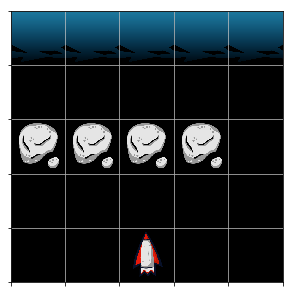

In [3]:
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'   # A = asteroid
'| | | | | |'
'| | |S| | |')  # S = spaceship
state

**Cílový stav** je takový stav, ve kterém se raketka nachází na horním řádku. Pro testování cílovosti stavu použijte funkci `is_goal(state)`.

In [4]:
# Ukazka stavu, ktery neni cilovy.
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
is_goal(state)

False

In [5]:
# Ukazka stavu, ktery je cilovy.
state_b = parse_state(
'| | | |S| |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | | | | |')
is_goal(state_b)

True

**Akce:**
Raketka letí stále vpřed a může přitom zatáčet doleva a doprava (dostoupné jsou tedy tři akce: 'l' jako 'left', 'f' jako 'forward', 'r' jako 'right'.

Funkce `actions` vrací seznam akcí dostupných v daném stavu:

In [6]:
actions(state)

['l', 'f', 'r']

Funkce `move(s, a)` vrací stav, který vznikne ze stavu *s* po provedení akce *a*:

State(3,1)

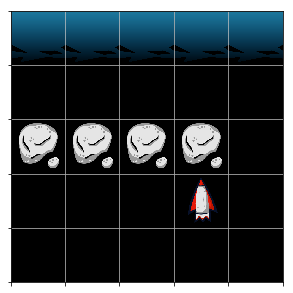

In [7]:
next_state = move(state, 'r')
next_state

Všimněte si, že raketka se při akci `r` posunula nejen o 1 pole doprava, ale současně i o 1 pole vpřed (tj. raketka letí stále vpřed).

V některých stavech nejsou dostupné všechny tři akce, ale jen některé:

In [8]:
actions(next_state)

['r']

**Plán:** Řešením problému je posloupnost akcí, které musí raketka vykonat, aby se dostala do cíle. Příklad plánu je řetězec `"ffl"` (rovně, rovně, doleva).


<div class="alert alert-block alert-success">
**Úkol 1: Dokončení plánu**<br/>
Upravte plán (proměnná *plan*) tak, aby raketka doletěla do cíle. 
</div>

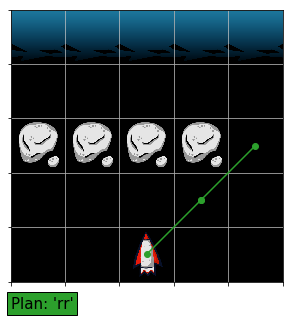

In [9]:
plan = 'rr'  # upravte tento plan
# SOLUTION: plan = 'rrff'
show_plan(state, plan, interactive=False)

<div class="alert alert-block alert-info">
**Shrnutí problému plánování**<br/>
<hr>

<p>
Problém plánování se skládá ze 4 částí:
<ul>
<li>počáteční stav,</li>
<li>funkce `actions(s)` vracející akce dostupné ve stavu *s*,</li>
<li>funkce `move(s, a)` vracející nový stav, který vznikne z *s* provedením *a*,</li>
<li>funkce `is_goal(s)` vracející *True* právě tehdy, když je *s* cílový stav.</li>
</ul>
</p>

Řešením problému je plán, čili posloupnost akcí, která dovede raketku z počátečního stavu do cílového. Pro vizualizaci plánu můžete použít funkci 
`show_plan(initial_state, plan)`.
</div>

# Hladové hledání (Greedy Search)

Na rozehřátí začneme zjednodušením: budeme předpokládat, že je v každém kroku bezpečné použít libovolnou z dostupných akcí, tj. že na mapě nejsou žádné "slepé uličky".

V takovém případě je tvorba plánu jednoduchá: vybíráme jakoukoliv dostupnou akci, dokud se nedostaneme do cíle.

<div class="alert alert-block alert-success">
**Úkol 2: Hladové hledání**<br/>
Implementujte funkci *greedy_search(initial_state)*,
která vrací hladově vytvořený plán pro cestu z *initial_state*
do cílového stavu.
Pokud hladová tvorba plánu selže (v některém stavu už nebude dostupná žádná akce), vraťte částečný plán.

<p>
Budete potřebovat:
<ul>
<li>funkce *actions(s)*, *move(s, a)*, *is_goal(s)*,</li>
<li>vytvoření prázdného plánu: `plan = ''`,</li>
<li>rozšíření plánu o jednu akci: `plan += action`.</li>
</ul>
</p>
</div>

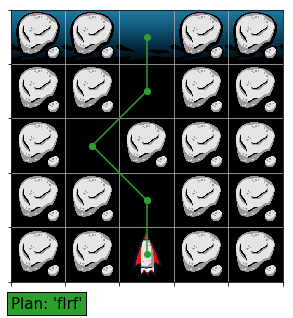

In [10]:
def greedy_search(initial_state):
    plan = []
    # TODO: Implementovat hladove vyhledavani.    
    # Vracime uplny nebo castecny plan.
    return plan

# SOLUTION:
def greedy_search(initial_state):
    state = initial_state
    plan = ''
    while not is_goal(state):
        available_actions = actions(state)
        if not available_actions:
            break # Failed to find a path.
        # Choose the first available action (greedy choice).
        action = available_actions[0]
        state = move(state, action)
        plan += action
    # Return a complete or a partial path.
    return plan

state = parse_state(
'|A|A| |A|A|'
'|A|A| |A|A|'
'|A| |A|A|A|'
'|A|A| |A|A|'
'|A|A|S|A|A|')
plan = greedy_search(state)
show_plan(state, plan, interactive=False)

Vyzkoušejte váš algoritmus i na jiných mapách. Hladové plánování bude dobře fungovat například na mapách s řídce rozmístěnými překážkami.

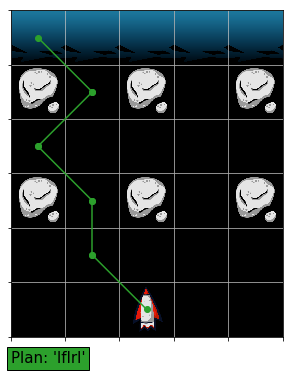

In [11]:
state = parse_state(
'| | | | | |'
'|A| |A| |A|'
'| | | | | |'
'|A| |A| |A|'
'| | | | | |'
'| | |S| | |')
plan = greedy_search(state)
show_plan(state, plan, interactive=False)

<div class="alert alert-block alert-success">
**Úkol 3: Hladové selhání**<br/>
Hladové plánování je rychlé a jednoduché,
nefunguje však ve všech situacích.
Vytvořte plán, ve kterém váš hladový algoritmus cestu do cíle nenajde,
protože skončí ve "slepé uličce".
</div>

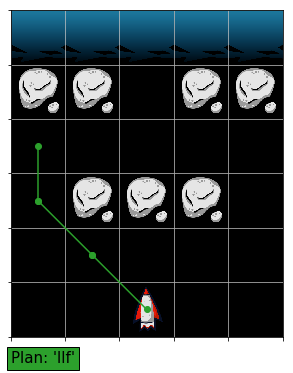

In [12]:
# Upravte tento plan:
state = parse_state(
'| | | | | |'
'|A| | | |A|'
'| | | | | |'
'| | |A| | |'
'| | | | | |'
'| | |S| | |')

# SOLUTION:
state = parse_state(
'| | | | | |'
'|A|A| |A|A|'
'| | | | | |'
'| |A|A|A| |'
'| | | | | |'
'| | |S| | |')

plan = greedy_search(state)
show_plan(state, plan, interactive=False)

<div class="alert alert-block alert-info">
**Shrnutí hladového plánování**<br/>
<hr>

<p>
Princip hladového hledání je volit v každém stavu první dostupnou akci.
Do hladového algoritmu lze snadno zakomponovat preferenci některých akcí (např. protože jsou některé akce levnější než jiné, nebo protože nás posunou blíže k cíli).
Hladové hledání je rychlé a jednoduché, nemusí však vždy najít řešení.
</p>
</div>

# Stromové prohledávání (tree search)

Obecně tedy nestačí uvažovat pouze jednu z dostupných akcí. Je možné že se při prohledávání budeme muset "vrátit na rozcestí" a vykonat nějakou jinou akci. Takovýto "průchod s návratem" lze reprezentovat pomocí tzv. *prohledávacího stromu* (anglicky *search tree*), ve kterém vrcholy reprezentují možné stavy a orientované hrany reprezentují akce, které převádějí jeden stav do druhého.

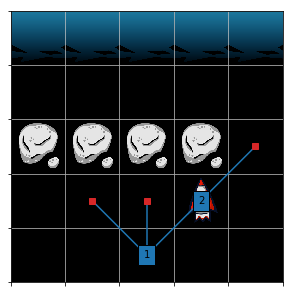

In [13]:
# Ukazka prohledavaciho stromu. Nejprve si vytvorime nekolik stavu.
s0 = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
s1 = move(s0, 'l')
s2 = move(s0, 'f')
s3 = move(s0, 'r')
s4 = move(s3, 'r')

with visualize_search(s0, interactive=False):
    log_search_step(explored_state=s0, fringe={s1, s2, s3})
    log_search_step(explored_state=s3, fringe={s1, s2, s4})

Stavy, které jsme již viděli (tj. jsou součástní prohledávácího stromu) se hodí rozdělit do dvou skupin podle toho, zda jsme už do stromu zařadili jejich následníky (zda jsme je "expandovali"):
* *prozkoumané* (*explored*) - expandované (zobrazené modře),
* stavy na *okraji* (*fringe*) - neexpandované (zobrazené červeně).

TODO: high-level popis stromoveho prohledavani slovy (v odrazkach), vyuziti vizualizace vyse

<div class="alert alert-block alert-success">
**Úkol 4: Schéma stromového prohledávání**<br/>
Prostudujte si následující schéma stromového prohledávání,
odkrokujte si ho, prodiskutujte ve dvojici
(TODO: co přesně diskutovat, jaké otázky zodpovědět,
např. vliv okraje, tj. strategie pro výběr stavu k prozkoumání; časová a paměťová složitost)
(TODO: zadat nějakou úpravu kódu?)
</div>

interactive(children=(IntSlider(value=10, description='Krok', max=10), Output()), _dom_classes=('widget-interact',))

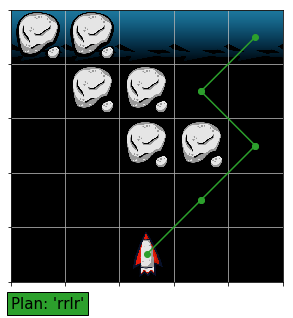

In [23]:
# Obecne schema stromoveho prohledavani.
# Je parametrizovane typem okraje (Fringe), ktery
# popisuje strategii pro vyber stavu k prozkoumani.
def tree_search(initial_state, Fringe):
    # UPDATE: Do okraje ukladame dvojice (stav, plan), kde plan popisuje,
    # jak se dostat do uvedeneho stavu z pocatecniho stavu.
    fringe = Fringe([initial_state])
    plans = {initial_state: ''}
    while fringe:
        # Vyber jednoho stavu z okraje.
        state = fringe.pop()
        # Pokud je tento stav cilovy, muzeme prohledavani ukoncit.
        if is_goal(state):
            log_search_step(state, fringe)
            return plans[state]
        # Pokud neni, expandujeme tento stav, tj. pridame na okraj
        # vsechny jeho nasledniky.
        for action in actions(state):
            next_state = move(state, action)
            plans[next_state] = plans[state] + action
            fringe.add(next_state)
        log_search_step(state, fringe)


state = parse_state(
'|A|A| | | |'
'| |A|A| | |'
'| | |A|A| |'
'| | | | | |'
'| | |S| | |')
with visualize_search(state, interactive=True):
    # Jako okraj muzeme pouzit napriklad mnozinu.
    plan = tree_search(state, Fringe=set)
show_plan(state, plan)

# Prohledávání do hloubky (DFS)

Motivace: pro konkrétní volby okraje, lze algoritmus trochu zjednodušit + získá nějaké pěkné vlastnosti (garance). Množina použítá výše nic moc. Lepší je zásobník (vysvětlit) -> úkol: implementovat DFS: inspirujte se obecným schématem výše, kód bude podobný, jen trochu jednodušší.

In [9]:
# Tree-DFS pomoci rekurze (nehlida zacykleni)
def dfs(state):
    """Return path from state to a goal state"""
    #print('---\nstate:\n' + str(state))
    #input()
    if state.is_goal():
        return [state]
    for action in actions(state):      
        next_state = perform(state, action)
        path = dfs(next_state)
        if path:
            return [state] + path
    return None  # no path found

state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(dfs(state))

| | |4| | |
| | | |3| |
|A|A|A|A|2|
| | | |1| |
| | |0| | |


In [25]:
# Rekurzivni graph-dfs (hlidajici zacykleni)
def recursive_graph_dfs(start_state):
    explored = set()
    def dfs(state):
        explored.add(state)
        if state.is_goal():
            return [state]
        for action in actions(state):      
            next_state = perform(state, action)
            if next_state in explored:
                continue
            path = dfs(next_state)
            if path:
                return [state] + path
        return None  # no path found
    return dfs(start_state)

state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(recursive_graph_dfs(state))

| | |4| | |
| | | |3| |
|A|A|A|A|2|
| | | |1| |
| | |0| | |


In [10]:
# Zasobnik = pridavame a odebirame ze stejneho konce,
# napr. stos knih, naskladane talire.
stack = ['a', 'b', 'c']  # vrchol zasobniku je vpravo ('c')
stack.append('d')  # pridani 'd' na vrchol zasobniku
print(stack)  # ['a', 'b', 'c', 'd']
stack.pop()  # odebrani prvku 'd' z vrcholu zasobniku
print(stack)  # ['a', 'b', 'c']
stack.pop()  # odebrani prvku 'c' z vrcholu zasobniku
print(stack)  # ['a', 'b']

['a', 'b', 'c', 'd']
['a', 'b', 'c']
['a', 'b']


In [11]:
# Terminology: tree vs. parents?
def reconstruct_path(tree, state):
    reversed_path = []
    while state is not None:
        reversed_path.append(state)
        state = tree[state]
    path = list(reversed(reversed_path))
    return path

    
# tree search - bez kontroly zacykleni
def iterative_dfs(initial_state):
    stack = [initial_state]
    tree = {initial_state: None}  # maps nodes to their parents
    while stack:
        LOGGER.log_search_tree(tree)
        state = stack.pop()
        if state.is_goal():
            return reconstruct_path(tree, state)
        for action in actions(state):
            next_state = perform(state, action)
            stack.append(next_state)
            tree[next_state] = state
            

LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(iterative_dfs(state))

| | | | |4|
| | | | |3|
|A|A|A|A|2|
| | | |1| |
| | |0| | |


In [32]:
# graph search - bez duplicitnich vypoctu a moznosti zacykleni

# TODO: potreba motivovat prikladem (zacykleni by potrebovalo
# cervi diry, ale redundantni vypocty lze i bez toho)

# Nasledujici algoritmus neprochazi vrcholy v korektnim DFS poradi,
# protoze pridava do zasobniku vsechny zkoumaneho stavu najednou
# a nikdy podruhe (pro zachovani liearni velikosti zasobniku).
# Pri hledani cesty k cilovemu stavu to nicemu nevadi, ale je
# dobre vedet, ze to neni presne DFS a pro nektere jine aplikace
# (napr. detekce orientovanych cyklu) by byl kod potreba upravit.
def graph_dfs(initial_state):
    stack = [initial_state]
    # tree - mapuje stavy na jejich rodice
    # v tomto pripade ukladame vrcholy do stromu
    # uz pri jejich videni 
    tree = { initial_state: None }
    while stack:
        state = stack.pop()
        LOGGER.log_search_tree(tree)
        if state.is_goal():
            return reconstruct_path(tree, state)
        for action in reversed(actions(state)):
            next_state = perform(state, action)
            # Vrcholy ukladame do stromu uz pri jejich videni.
            # To nam umozni linearni velikost zasobniku
            # (kazdy vrchol tam bude nejvyse jednou.)
            if next_state not in tree:  # uz jsme ho videli
                tree[next_state] = state
                stack.append(next_state)

LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(graph_dfs(state))            

| | |4| | |
| | | |3| |
|A|A|A|A|2|
| | | |1| |
| | |0| | |


Co DFS nezvladne: pokud nejsou reseni ve stejne hloubce (a pritom chceme najit optimalni cestu). Priklad s cervimi dirami:

In [13]:
LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | |W| |'
'| | | | | |'
'| | |W| | |'
'| | |A| | |'
'| | |S| | |')
show_path(graph_dfs(state))

| | | | |5|
| | | |W|4|
| | | | |3|
| | |W| |2|
| | |A|1| |
| | |0| | |


# BFS (Breadth-first search)

In [14]:
# Fronta = usporadana kolekce prvku, odebirame a pridavame na opacne
# konce, jako u bezne fronty napr. v obchode.
queue = deque(['a', 'b', 'c'])  # 'a' na zacatku fronty, 'c' na konci
queue.append('d')  # 'd' prisel na konec fronty
print(queue)  # deque(['a', 'b', 'c', 'd'])
queue.popleft()  # odchazi 'a'
print(queue)  # deque(['b', 'c', 'd'])
queue.popleft()  # odchazi 'b'
print(queue)  # deque(['c', 'd'])

deque(['a', 'b', 'c', 'd'])
deque(['b', 'c', 'd'])
deque(['c', 'd'])


In [15]:
# TODO: svet, ktery nejde optimalne resit pomoci DFS
# (cervi diry nebo nestejna hloubka reseni)

In [16]:
def bfs(initial_state):
    if initial_state.is_goal():
        return [initial_state]
    queue = deque([initial_state])
    tree = {initial_state: None}  # maps states to their parents
    while queue:
        LOGGER.log_search_tree(tree)
        state = queue.popleft()
        for action in actions(state):
            next_state = perform(state, action)
            if (next_state in tree.keys()
                or next_state in queue):
                continue
            queue.append(next_state)
            tree[next_state] = state
            # U BFS lze test na cilovy stav provadet uz zde.
            if next_state.is_goal():
                return reconstruct_path(tree, next_state)

# LOGGER.debug(False)
# state = parse_state(
# '| | | | | |'
# '| | | | | |'
# '|A|A|A|A| |'
# '| | | | | |'
# '| | |S| | |')
# show_path(bfs(state))
LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | |W| |'
'| | | | | |'
'| | |W| | |'
'| | |A| | |'
'| | |S| | |')
show_path(bfs(state))

| | |3| | |
| | | |2| |
| | | | | |
| | |W| | |
| |1|A| | |
| | |0| | |


# Uniform Cost Search (UCS) (Dijkstra)

Přidání cen akcí -> DFS ani BFS nestačí.

Příklad cen: let dopředu 2, let vlevo/vpravo 3.
(nebo lze pridat strileni s vyssi cenou)

In [17]:
# # TODO: vysvetlit prioritni haldu
# from heapq import heappush, heappop

# queue = []
# heappush(queue, (5, 'a'))  # Vkladame prvek 'a' s prioritou 5.
# heappush(queue, (3, 'b'))  # Vkladame prvek 'b' s prioritou 3.
# heappush(queue, (7, 'c'))  # Vkladame prvek 'c' s prioritou 7.
# print(queue)  # [(3, 'b'), (5, 'a'), (7, 'c')]
# print(heappop(queue)) # (3, 'b')
# print(queue)  # [(5, 'a'), (7, 'c')]
# print(heappop(queue)) # (5, 'a')
# print(queue)  # [(7, 'c')]

costs = {}
costs['a'] = 5
costs['b'] = 3
costs['c'] = 7
min(costs, key=lambda x: costs[x])

'b'

In [18]:
from math import inf
ACTION_COSTS = {'l': 3, 'f': 2, 'r': 3}

def ucs(initial_state):
    # Ke kazdeme videnemu stavu ulozime jeho rodice.
    tree = {initial_state: None}
    # Do fronty ukladame dvojice (cena, stav).
    #queue = [(0, initial_state)]
    # Budeme zvlast ukladat vsechny ceny (i do jiz prozkoumanych
    # vrcholu) a okraj (vrcholy k prozkoumani).
    costs = {initial_state: 0}
    fringe = {initial_state}
    while fringe:
        LOGGER.log_costs(costs)
        #cost, state = heappop(queue)
        state = min(fringe, key=lambda s: costs[s])
        fringe.remove(state)
        if state.is_goal():
            return reconstruct_path(tree, state)
        for action in actions(state):
            next_state = perform(state, action)
            new_cost = costs[state] + ACTION_COSTS[action]
            # FIX: kazdy stav je unikatni, potreba implementovat
            # komparator, ktery bude povazovat stavy se stejnou
            # pozici za ekvivalentni
            old_cost = costs.get(next_state, inf)
            if new_cost < old_cost:
                fringe.add(next_state)
                costs[next_state] = new_cost
                tree[next_state] = state
            
LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(ucs(state))

| | | | |4|
| | | | |3|
|A|A|A|A|2|
| | | |1| |
| | |0| | |


# A*

Kombinace UCS a heuristiky.

Příklad heuristiky: vertikální vzdálenost od cíle (komplikovanější heuristiky můžou brát v úvahu počet posbíraných diamantů).

TODO: ukázat příklad, kdy UCS prohledává zbytečně moc (potřeba červích děr nebo diamantů) a jak to vyřešit pomocí jednoduché heuristiky

In [19]:
def heuristic_distance(state):
    return state.spaceship.row

In [20]:
heuristic_distance(parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | |S| | |'
'| | | | | |'))

3

In [21]:
heuristic_distance(parse_state(
'| | |S| | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | | | | |'))

0

In [22]:
# Jako UCS, lisi se jen vypoctem ceny.
def a_star(initial_state, heuristic):
    # Ke kazdeme videnemu stavu ulozime jeho rodice.
    tree = {initial_state: None}
    # Do fronty ukladame dvojice (cena, stav).
    #queue = [(0, initial_state)]
    # Budeme zvlast ukladat vsechny ceny (i do jiz prozkoumanych
    # vrcholu) a okraj (vrcholy k prozkoumani).
    costs = {initial_state: 0}
    fringe = {initial_state}
    while fringe:
        LOGGER.log_costs(costs, heuristic)
        #cost, state = heappop(queue)
        # Jedina zmena oproti UCS:
        state = min(fringe, key=lambda s: costs[s] + heuristic(s))
        fringe.remove(state)
        if state.is_goal():
            return reconstruct_path(tree, state)
        for action in actions(state):
            next_state = perform(state, action)
            new_cost = costs[state] + ACTION_COSTS[action]          
            old_cost = costs.get(next_state, inf)
            if new_cost < old_cost:
                fringe.add(next_state)
                costs[next_state] = new_cost
                tree[next_state] = state
            
LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(a_star(state, heuristic=heuristic_distance))

| | | | |4|
| | | | |3|
|A|A|A|A|2|
| | | |1| |
| | |0| | |


## TODO

- intro
- DFS
- DFS - explain tree search vs. graph search
- nastroje pro pohodlne ladeni vsech algoritmu (vizualizace cesty i prubehu planovani (explored/frontier/unexplored states) -> umoznit vypisy (ala logger), vcetne textovych (-> muzu zkopirovat text stavu a vyzkouset si zacit z neho atp.)
- DFS - recursive version
- BFS (motivace: cervi diry - DFS nemusi najit nejkratsi cestu)
- UCS
- A\*
- refaktorovat (zprehlednit, zjednodusit, okomenotvat) kod
- inline react component for visualizing states, paths (and ideally also allow to play the game... or at least provide a link to task-editor)
- rezerva: greedy search, BF, DP, "patnáctka" (sliding tiles)
- parsovani sveta (jako v JS)
- vyfaktorovat pomocné funkce do samostatného .py modulu
- hezčí vykreslování stavu (HTML tabulka, react components)
- another notebook with stripped solutions
- inspirace: Jak to vyresit, Programatorska cvicebnice, Sbirka do Navalu, KSI (napr. Honzovo bludiste, davna DFS/BFS videa), Ucadity AI, EdX AI lecture, google
- testing by friends
- utopicke: pridat jako dalsi level do RoboMise (s pripravenymi high-level bloky a/nebo v RoboKodu)

## Rozšíření
* protihráč -> minimax
* náhoda, nejistota -> expectimax, MDP (value iteration - DP)
* too many states (even infinitely many of them)
* continuous actions
* ...

## Další zdroje
* TBA: videa z AI kurzu na EdX